In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

Будем учиться классифицировать жанры музыки, полузуюсь не аудио дорожками, а уже осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [5]:
data = pd.read_csv("train.csv")
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [6]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

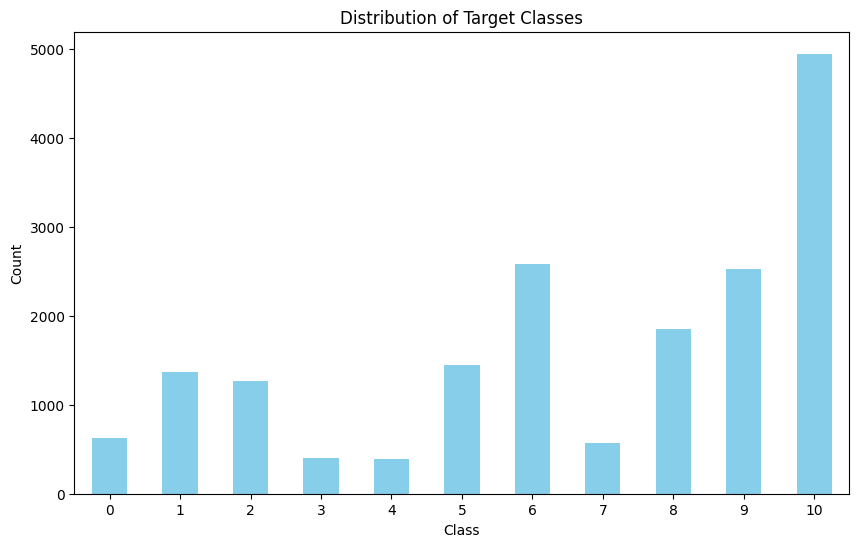

In [8]:
# Check Distribution of Target Classes
plt.figure(figsize=(10, 6))
data['Class'].value_counts().sort_index().plot(kind='bar', color = 'skyblue')
plt.title('Distribution of Target Classes')
plt.xticks(rotation=0) 
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Total NA: 6819

Rows with NA: 6183

Number of NA's by columns:
Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0


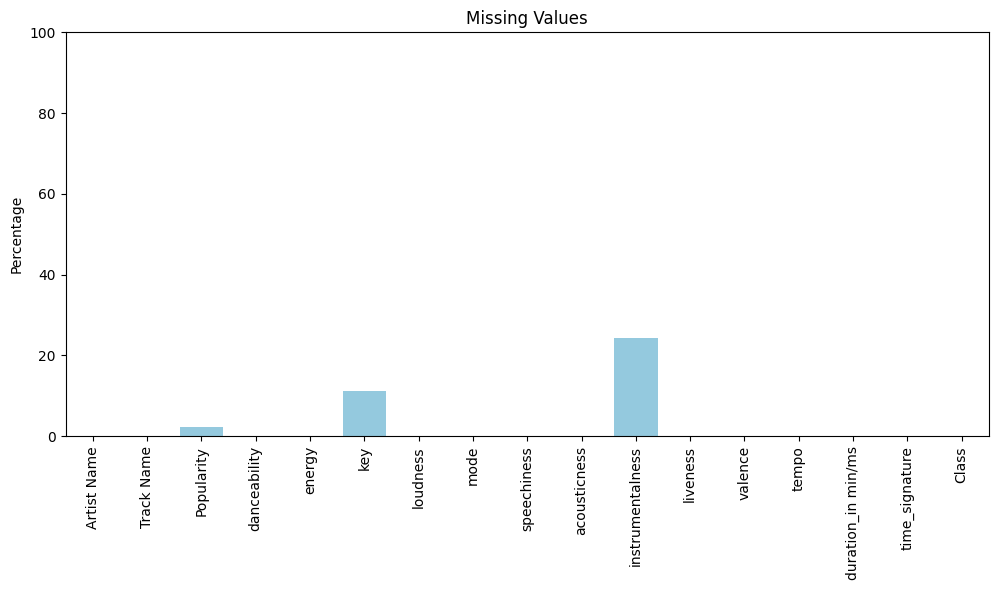

In [36]:
# Check Missing values
na_total = data.isna().sum().sum()
na_rows = data.isna().sum(axis = 1)>0
na_by_cols = data.isna().sum().to_string()
print(f'Total NA: {na_total}\n')
print(f'Rows with NA: {na_rows.sum()}\n')
print(f'Number of NA\'s by columns:\n{na_by_cols}')

plt.figure(figsize=(10, 6))
missing_values = data.isna().mean() * 100
missing_df = pd.DataFrame({'Variable': missing_values.index, 'Missing Percentage': missing_values.values})
sns.barplot(data=missing_df, x='Variable', y='Missing Percentage', fill = "True", color = 'skyblue')
plt.xticks(rotation=90) 
plt.ylabel('Percentage')
plt.xlabel(None)
plt.title('Missing Values')
plt.tight_layout()
plt.ylim(0, 100)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

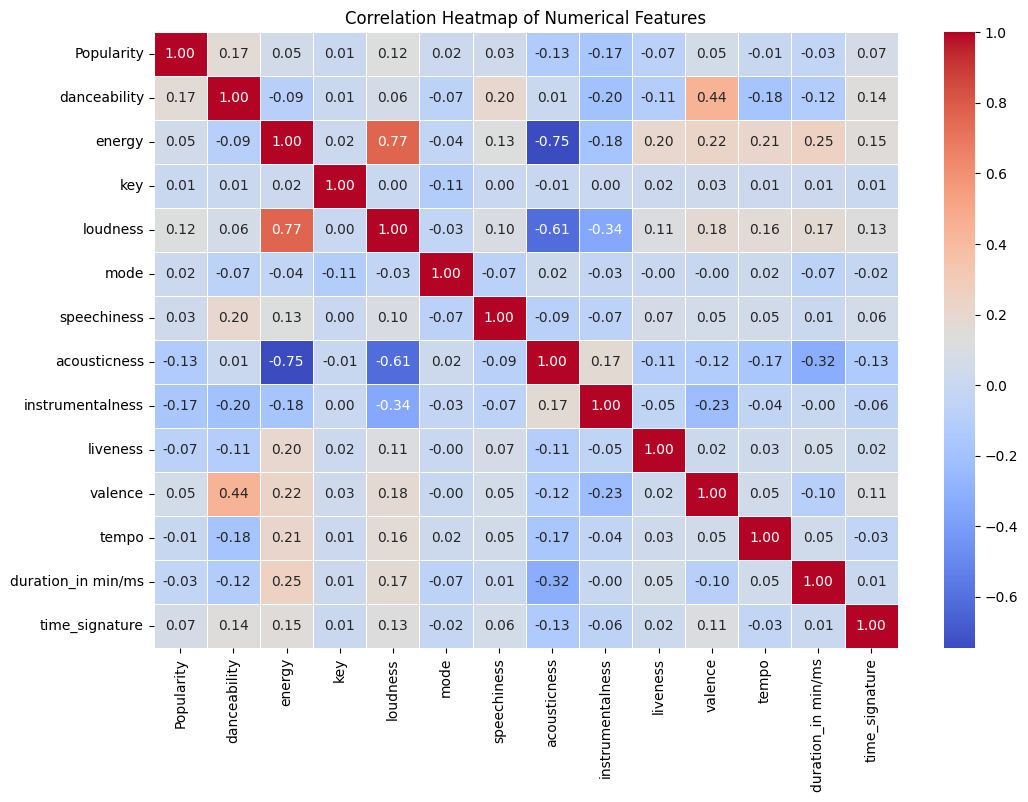

In [11]:
# Check the correlation between numerical features
numerical_columns = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                      'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                      'valence', 'tempo', 'duration_in min/ms', 'time_signature']
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show

При EDA в датасете были выявлены следущие проблемы:
- Несбалансированность классов таргетной переменной
- Большое количество пропущенных значений в переменных `key`, `popularity` и `instrumentalness`
- Количественные переменные варьируют в разных шкалах и имеют разную дисперсию

### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [43]:
## Preprocessing

# Drop unnecessary columns
data_clean = data.drop(columns=['Artist Name', 'Track Name'])

# Define features (X) and target variable (y)
X = data_clean.iloc[:, :-1] 
y = data_clean.iloc[:,-1] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Пропущенные значения было решено оставить как есть, поскольку "DecisionTreeClassifier is designed to handle NaN values without preprocessing"

# Encode categorical variables and scale numerical variables
categorical_columns = ['mode', 'time_signature']
preprocessor = ColumnTransformer(transformers=[
    ("scaler", StandardScaler(), numerical_columns),
    ("ohe", OneHotEncoder(drop="first"), categorical_columns)
])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(X_train.shape, y_train.shape, X_test.shape)


(13497, 18) (13497,) (4499, 18)


In [51]:
# Selection of the best parameters
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': range (1,12, 2),
              'max_features': ['sqrt', 'log2'],
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2)
              }

tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 12, 2),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2)},
             verbose=True)

In [53]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 4}

In [70]:
# Training the final model and prediction
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [71]:
# Check accuracy of prediction
accuracy_score(y_test, y_pred)

0.42276061346965993

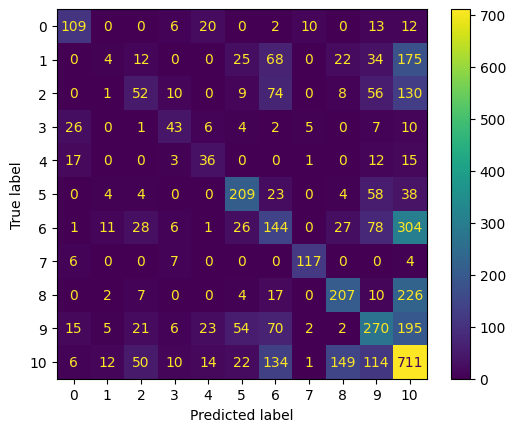

In [72]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Видно, что несбалансированность классов повлияла на качество модели. Чаще всего предсказываются классы, которые больше всего представлены - 6 и 10.

### Задание 3. Другие модели (без баллов, просто если есть желание)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

### Задание 4. (0.5 доп. балла)

Расскажите про свои любимые фильмы, мультики и тд.

Любимые фильмы - "Три билборда" (2017), "Искупление" (2007), "Лолита" (1997) - все с увлекательным сюжетом, характерными героями и неожиданной развязкой. Из того, что посмотрел недавно, запомнились "Тар" и "Худший человек на земле". 